# Semi Structured Data Project
Parin Patel 
IST-657

Outline of Project:
1. Write a program that will read in JSON Formatted data from a file
2. Perform Data Analysis Summaries of import Data
3. Look at Washington Post Twitter data and explore headlines for trends (legnth and words).



*Overview*: The goal of this projet was to write a program to read and explore the headlines of the Washington Post. I noticed prior that the washington post linked their twitter posts to actual content published in their newspaper. Additionally, the twitter arm of the Washington Post, like most newspapers, highlights and shares content that they think users would find interesting. I wanted to analyze what type of stories the Washington Post posted on their twitter to engange with users.






In [6]:
conda install -c conda-forge tweepy

Solving environment: done

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install credentials

Note: you may need to restart the kernel to use updated packages.


In [29]:
#Import Libraries
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import numpy as np
import re    
import nltk  
import string
import warnings


from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [102]:
##Prep twitter extraction. 
# Consume:
CONSUMER_KEY    = 'Z7swYxO4lISDASbwuMLoHXQnX'
CONSUMER_SECRET = 'DDBJKxoY3Mfb7s5hbIl5kTk3HSpolQsIbtxQw71iGtgD3MdyZp'

# Access:
ACCESS_TOKEN  = '419036539-HJweI12U9lBDsDPCdiJFjSYqhGkyskGjEScalAyQ'
ACCESS_SECRET = 'DhkaDeyJbZ2qyNqGxY9JdoVPhkXoOjOw0o0pO7mItM6rY'

# We import access keys:
from credentials import *    

# API setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication / access with keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


In [103]:
##get the data from tweets.
#extractor = object
extract = twitter_setup()

# Create a list of tweets
tweets = extract.user_timeline(screen_name="washingtonpost", count=2000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 10 tweets:
print("10 recent tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()



Number of tweets extracted: 200.

10 recent tweets:

North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp

Lawmakers press Pentagon on oversight of "slumlord" housing contractors https://t.co/1YDYF2cqY4

Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4

Russians spotted a polar bear painted in cryptic graffiti. Scientists are searching for answers. https://t.co/qDeX5f4ksd

Opinion: The two challenges that doomed Kamala Harris https://t.co/iwkYXixGVb

Analysis: Signs of change in Elizabeth Warren's campaign https://t.co/MXYT6pBod7

This Peloton ad is a dystopian fitness inspo hellscape https://t.co/UnDf6iejvK

Opinion: The Intelligence Committee’s report is a triumph https://t.co/swDpdwWDJD

Opinion: The people have spoken! Kamala Harris is out! https://t.co/moeSHteOCz

New York is shipping its homeless to squalid housing out of state, Newark lawsuit claims https://t.co/pfL4maxNoX



## PART 2: Use pandas dataframe to process data.

In [104]:
# Create pandas df
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# display first 10 tweets-  check 
display(data.head(10))

,Tweets
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4"
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4
3,Russians spotted a polar bear painted in cryptic graffiti. Scientists are searching for answers. https://t.co/qDeX5f4ksd
4,Opinion: The two challenges that doomed Kamala Harris https://t.co/iwkYXixGVb
5,Analysis: Signs of change in Elizabeth Warren's campaign https://t.co/MXYT6pBod7
6,This Peloton ad is a dystopian fitness inspo hellscape https://t.co/UnDf6iejvK
7,Opinion: The Intelligence Committee’s report is a triumph https://t.co/swDpdwWDJD
8,Opinion: The people have spoken! Kamala Harris is out! https://t.co/moeSHteOCz
9,"New York is shipping its homeless to squalid housing out of state, Newark lawsuit claims https://t.co/pfL4maxNoX"


In [105]:
#clean tweets.  

data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


#post clean- view first 5 
display(data.head(5))

,Tweets,len,ID,Date,Source,Likes,RTs
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,75,1202056460760485888,2019-12-04 02:46:08,SocialFlow,131,43
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",95,1202055685330128896,2019-12-04 02:43:03,SocialFlow,71,21
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4,119,1202054424782417920,2019-12-04 02:38:02,SocialFlow,47,6
3,Russians spotted a polar bear painted in cryptic graffiti. Scientists are searching for answers. https://t.co/qDeX5f4ksd,120,1202054173686194176,2019-12-04 02:37:02,SocialFlow,74,39
4,Opinion: The two challenges that doomed Kamala Harris https://t.co/iwkYXixGVb,77,1202054172012625921,2019-12-04 02:37:02,SocialFlow,37,15


In [106]:
import os
os.getcwd() #check directory. Getting buggy right now. 

'/Users/parinpatel/Documents'

In [107]:
Output = data.to_json(r'/Users/parinpatel/Documents/IST 652 .Scripting/HW2/Output_Tweets.json')

In [108]:
import pandas as pd
json_file = (r'/Users/parinpatel/Documents/IST 652 .Scripting/HW2/Output_Tweets.json')
pd_json = pd.read_json(json_file, convert_dates=True)
pd_json.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,75,1202056460760485888,2019-12-04 02:46:08,SocialFlow,131,43
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",95,1202055685330128896,2019-12-04 02:43:03,SocialFlow,71,21
10,"Weather forecasters near and far lean toward slightly snowy winter in Washington, with near-average temperatures https://t.co/g3mhlwyPyK",136,1202038826761211904,2019-12-04 01:36:03,SocialFlow,56,17
100,"“I don’t know him, no,” Trump said, despite numerous photos of the two together: on a walk in June, smiling at West… https://t.co/tIbnJtzPS6",140,1201881146415570945,2019-12-03 15:09:29,TweetDeck,5035,2731
101,RT @mateagold: The Mueller Report Illustrated is LIVE. Start reading chapter 1 here: ‘This Russia thing is far from over.’ With audio analy…,140,1201880542779715586,2019-12-03 15:07:05,TweetDeck,0,330
102,Analysis: William Barr’s heavy hand looms again https://t.co/Yq6PkUln0A,71,1201880538979676160,2019-12-03 15:07:05,SocialFlow,143,65
103,RT @John_Hudson: The debut of the Post's foray into graphic non-fiction https://t.co/3RMvvGxqad https://t.co/JgjFp5O0HH,119,1201879103181393923,2019-12-03 15:01:22,TweetDeck,0,18
104,He says his boss told him to ignore the rat infestation in the ceiling. Then it fell on him. https://t.co/IuBmcBm71h,116,1201878785941024768,2019-12-03 15:00:07,SocialFlow,107,48
105,RT @eilperin: This year Post photographers have traveled the globe to capture images of what it means to live in the fastest-warming spots…,139,1201877728112316418,2019-12-03 14:55:54,TweetDeck,0,57
106,White House says it is considering tariffs of up to 100 percent on $2.4 billion in French imports https://t.co/Nijdls7J1N,121,1201877004519428098,2019-12-03 14:53:02,SocialFlow,102,66


# Data Exploration

In [109]:
##Data exploration of a single tweet. Trying to understand what comprises of a tweet.  0 = first tweet. 
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1202056460760485888
2019-12-04 02:46:08
SocialFlow
131
43
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/EudWKbkTBp', 'expanded_url': 'https://wapo.st/2DK4Uvr', 'display_url': 'wapo.st/2DK4Uvr', 'indices': [52, 75]}]}


##  Avg Length of Tweets Posted

In [110]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

mean = np.mean(data['len']) #mean of length

print("The average length of the Tweets posted by the Washington Post is  {}".format(mean), "characters.")

The average length of the Tweets posted by the Washington Post is  109.635 characters.


Text(0.5, 0.98, 'Frequency of Tweet Length ')

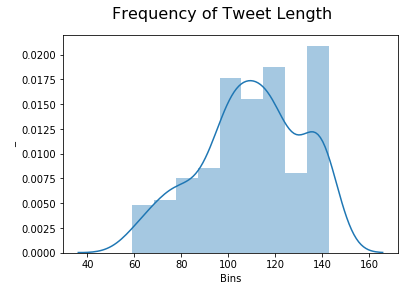

In [111]:
sns.distplot(data['len']);
plt.xlabel("Bins")
plt.ylabel("_")
plt.suptitle('Frequency of Tweet Length ', fontsize=16)

In [112]:
#Create df of tweet and count of words. 
data['word_count'] = data['Tweets'].apply(lambda x: len(str(x).split(" ")))
data[['Tweets','word_count']].head()

,Tweets,word_count
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,10
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",10
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4,15
3,Russians spotted a polar bear painted in cryptic graffiti. Scientists are searching for answers. https://t.co/qDeX5f4ksd,15
4,Opinion: The two challenges that doomed Kamala Harris https://t.co/iwkYXixGVb,9


## Review of Tweet Lenght 
* Does the Post prefers to use a lot of characters in their tweets?
* In General - are are the W.Post tweets longer or shorter? 

Text(27.125, 0.5, 'Tweet Number of Words')

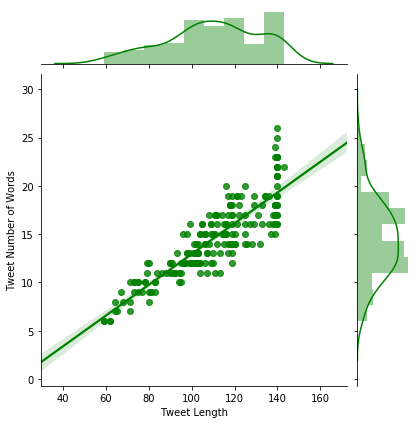

In [113]:
sns.jointplot(data=data, x='len', y='word_count', kind='reg', color='g')
plt.xlabel("Tweet Length")
plt.ylabel("Tweet Number of Words")

In [114]:
# Number of Characters
data['char_count'] = data['Tweets'].str.len() ## this also includes spaces
meanChar = np.mean(data['char_count'])

print("The average number of characters used in the Washington Posts Tweets are: {}".format(meanChar))

The average number of characters used in the Washington Posts Tweets are: 109.635


In [115]:
data.head(5)


,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,75,1202056460760485888,2019-12-04 02:46:08,SocialFlow,131,43,10,75
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",95,1202055685330128896,2019-12-04 02:43:03,SocialFlow,71,21,10,95
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4,119,1202054424782417920,2019-12-04 02:38:02,SocialFlow,47,6,15,119
3,Russians spotted a polar bear painted in cryptic graffiti. Scientists are searching for answers. https://t.co/qDeX5f4ksd,120,1202054173686194176,2019-12-04 02:37:02,SocialFlow,74,39,15,120
4,Opinion: The two challenges that doomed Kamala Harris https://t.co/iwkYXixGVb,77,1202054172012625921,2019-12-04 02:37:02,SocialFlow,37,15,9,77


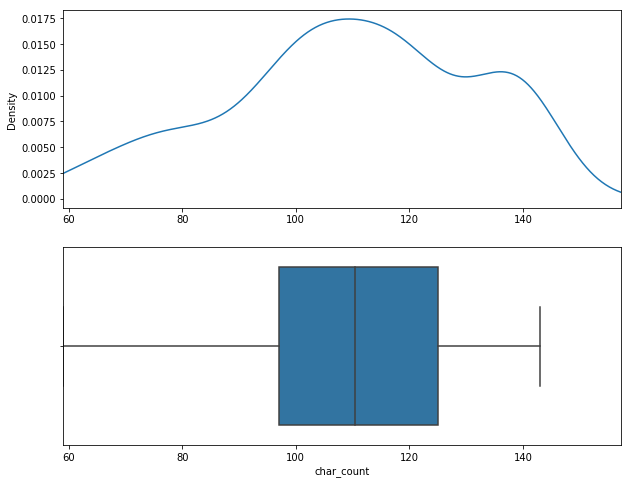

In [116]:
#Plot of character count

# percentile 
q75, q25 = np.percentile(data.char_count, [75 ,25])
pc = q75 - q25
 
min = q25 - (pc*1.5)
max = q75 + (pc*1.5)

cc = data['char_count']
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data['char_count'].min(), data['char_count'].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = data['char_count'].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data['char_count'].min(), data['char_count'].max()*1.1)
sns.boxplot(x=data['char_count'])
plt.axvline(x=min)
plt.axvline(x=max)

In [117]:
##find the average legnth of the words in the tweets. Add to the previous created df

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Tweets'].apply(lambda x: avg_word(x))
data[['Tweets','char_count','word_count','avg_word']].head(5)

,Tweets,char_count,word_count,avg_word
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,75,10,6.600000
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",95,10,8.600000
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4,119,15,7.000000
3,Russians spotted a polar bear painted in cryptic graffiti. Scientists are searching for answers. https://t.co/qDeX5f4ksd,120,15,7.066667
4,Opinion: The two challenges that doomed Kamala Harris https://t.co/iwkYXixGVb,77,9,7.666667


# Text Analysis

In [118]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parinpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
data.head(5)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,75,1202056460760485888,2019-12-04 02:46:08,SocialFlow,131,43,10,75,6.600000
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",95,1202055685330128896,2019-12-04 02:43:03,SocialFlow,71,21,10,95,8.600000
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4,119,1202054424782417920,2019-12-04 02:38:02,SocialFlow,47,6,15,119,7.000000
3,Russians spotted a polar bear painted in cryptic graffiti. Scientists are searching for answers. https://t.co/qDeX5f4ksd,120,1202054173686194176,2019-12-04 02:37:02,SocialFlow,74,39,15,120,7.066667
4,Opinion: The two challenges that doomed Kamala Harris https://t.co/iwkYXixGVb,77,1202054172012625921,2019-12-04 02:37:02,SocialFlow,37,15,9,77,7.666667


In [120]:
# Find number of stop words. add to df
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Tweets','Date','Likes','RTs','char_count','word_count','avg_word','stopwords']].head()

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,2019-12-04 02:46:08,131,43,75,10,6.600000,3
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",2019-12-04 02:43:03,71,21,95,10,8.600000,2
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4,2019-12-04 02:38:02,47,6,119,15,7.000000,5
3,Russians spotted a polar bear painted in cryptic graffiti. Scientists are searching for answers. https://t.co/qDeX5f4ksd,2019-12-04 02:37:02,74,39,120,15,7.066667,4
4,Opinion: The two challenges that doomed Kamala Harris https://t.co/iwkYXixGVb,2019-12-04 02:37:02,37,15,77,9,7.666667,1


In [121]:
# Find number of hashtags. add to df

data['hashtags'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'avg_word','stopwords','hashtags']].head(3)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords,hashtags
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,2019-12-04 02:46:08,131,43,75,10,6.6,3,0
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",2019-12-04 02:43:03,71,21,95,10,8.6,2,0
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4,2019-12-04 02:38:02,47,6,119,15,7.0,5,0


In [122]:
# Find number of numbers/numeric data. add to df
data['numerics'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'avg_word','stopwords','hashtags','numerics']].head(3)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords,hashtags,numerics
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,2019-12-04 02:46:08,131,43,75,10,6.6,3,0,1
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",2019-12-04 02:43:03,71,21,95,10,8.6,2,0,0
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4,2019-12-04 02:38:02,47,6,119,15,7.0,5,0,0


In [123]:
# Find number of capitalized  words. add to df

data['capitalized'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'word_count','avg_word','stopwords','hashtags','numerics','capitalized']].head(3)

,Tweets,Date,Likes,RTs,char_count,word_count,word_count,avg_word,stopwords,hashtags,numerics,capitalized
0,North Carolina has a new congressional map for 2020 https://t.co/EudWKbkTBp,2019-12-04 02:46:08,131,43,75,10,10,6.6,3,0,1,0
1,"Lawmakers press Pentagon on oversight of ""slumlord"" housing contractors https://t.co/1YDYF2cqY4",2019-12-04 02:43:03,71,21,95,10,10,8.6,2,0,0,0
2,Analysis: Drake was Spotify’s most-streamed artist of the decade. What does that actually mean? https://t.co/xGf3oNANH4,2019-12-04 02:38:02,47,6,119,15,15,7.0,5,0,0,0


In [124]:
#covert to lowercase for preprocessing
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Tweets'].head()


0                                                 north carolina has a new congressional map for 2020 https://t.co/eudwkbktbp
1                             lawmakers press pentagon on oversight of "slumlord" housing contractors https://t.co/1ydyf2cqy4
2     analysis: drake was spotify’s most-streamed artist of the decade. what does that actually mean? https://t.co/xgf3onanh4
3    russians spotted a polar bear painted in cryptic graffiti. scientists are searching for answers. https://t.co/qdex5f4ksd
4                                               opinion: the two challenges that doomed kamala harris https://t.co/iwkyxixgvb
Name: Tweets, dtype: object

In [125]:
#delete any punctuation symbols 
data['Tweets'] = data['Tweets'].str.replace('[^\w\s]','')
data['Tweets'].head()

0                                               north carolina has a new congressional map for 2020 httpstcoeudwkbktbp
1                             lawmakers press pentagon on oversight of slumlord housing contractors httpstco1ydyf2cqy4
2        analysis drake was spotifys moststreamed artist of the decade what does that actually mean httpstcoxgf3onanh4
3    russians spotted a polar bear painted in cryptic graffiti scientists are searching for answers httpstcoqdex5f4ksd
4                                              opinion the two challenges that doomed kamala harris httpstcoiwkyxixgvb
Name: Tweets, dtype: object

In [126]:
#delete the stop words 
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Tweets']= data['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Tweets'].head()

0                                            north carolina new congressional map 2020 httpstcoeudwkbktbp
1                      lawmakers press pentagon oversight slumlord housing contractors httpstco1ydyf2cqy4
2                     analysis drake spotifys moststreamed artist decade actually mean httpstcoxgf3onanh4
3    russians spotted polar bear painted cryptic graffiti scientists searching answers httpstcoqdex5f4ksd
4                                          opinion two challenges doomed kamala harris httpstcoiwkyxixgvb
Name: Tweets, dtype: object

In [133]:
#Common words freq count
freqWPT = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:50]
freqWPT

opinion        37
trump          36
analysis       32
impeachment    21
report         19
trumps         16
mueller        14
says           13
house          10
ukraine         8
nato            8
wants           7
illustrated     7
said            7
republicans     6
court           6
kamala          6
perspective     6
president       6
justice         5
today           5
news            5
inquiry         5
campaign        5
white           5
harris          5
tariffs         5
doesnt          4
north           4
graphic         4
change          4
world           4
prince          4
russia          4
democrats       4
know            4
still           4
defense         4
nonfiction      4
andrew          4
states          4
cant            4
french          4
american        4
democratic      3
meeting         3
election        3
buttigieg       3
christmas       3
series          3
dtype: int64

In [145]:
# tweets with short words under 3 removed
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

data.head(5)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,capitalized
0,north carolina congressional httpstcoeudwkbktbp,75,1202056460760485888,2019-12-04 02:46:08,SocialFlow,131,43,10,75,6.600000,3,0,1,0
1,lawmakers press pentagon oversight slumlord housing contractors httpstco1ydyf2cqy4,95,1202055685330128896,2019-12-04 02:43:03,SocialFlow,71,21,10,95,8.600000,2,0,0,0
2,analysis drake spotifys moststreamed artist decade actually httpstcoxgf3onanh4,119,1202054424782417920,2019-12-04 02:38:02,SocialFlow,47,6,15,119,7.000000,5,0,0,0
3,russians spotted polar painted cryptic graffiti scientists searching answers httpstcoqdex5f4ksd,120,1202054173686194176,2019-12-04 02:37:02,SocialFlow,74,39,15,120,7.066667,4,0,0,0
4,opinion challenges doomed kamala harris httpstcoiwkyxixgvb,77,1202054172012625921,2019-12-04 02:37:02,SocialFlow,37,15,9,77,7.666667,1,0,0,0


In [146]:
#freq count of common words created again. 
freqWPT = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:50]
freqWPT

opinion         37
trump           36
analysis        32
impeachment     21
report          19
trumps          16
mueller         14
house           10
ukraine          8
illustrated      7
wants            7
kamala           6
republicans      6
president        6
perspective      6
court            6
campaign         5
harris           5
white            5
today            5
justice          5
inquiry          5
tariffs          5
american         4
french           4
andrew           4
states           4
doesnt           4
democrats        4
graphic          4
prince           4
world            4
still            4
defense          4
north            4
change           4
russia           4
nonfiction       4
thats            3
state            3
hunter           3
election         3
intelligence     3
democratic       3
could            3
decade           3
meeting          3
billion          3
giuliani         3
calls            3
dtype: int64

In [147]:
text = data['Tweets']
text.head(5)

0                                                    north carolina congressional httpstcoeudwkbktbp
1                 lawmakers press pentagon oversight slumlord housing contractors httpstco1ydyf2cqy4
2                     analysis drake spotifys moststreamed artist decade actually httpstcoxgf3onanh4
3    russians spotted polar painted cryptic graffiti scientists searching answers httpstcoqdex5f4ksd
4                                         opinion challenges doomed kamala harris httpstcoiwkyxixgvb
Name: Tweets, dtype: object

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from IPython.display import Image as im

In [62]:
pip install Twython

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [64]:
from wordcloud import WordCloud, STOPWORDS

In [149]:
#Create a string form of our list of text
stringtxt = ''.join(text)
no_links = re.sub(r'http\S+', '', stringtxt)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [150]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [151]:
wc = WordCloud(background_color="white", max_words=2000)
clean_string = ','.join(words)
wc.generate(clean_string)

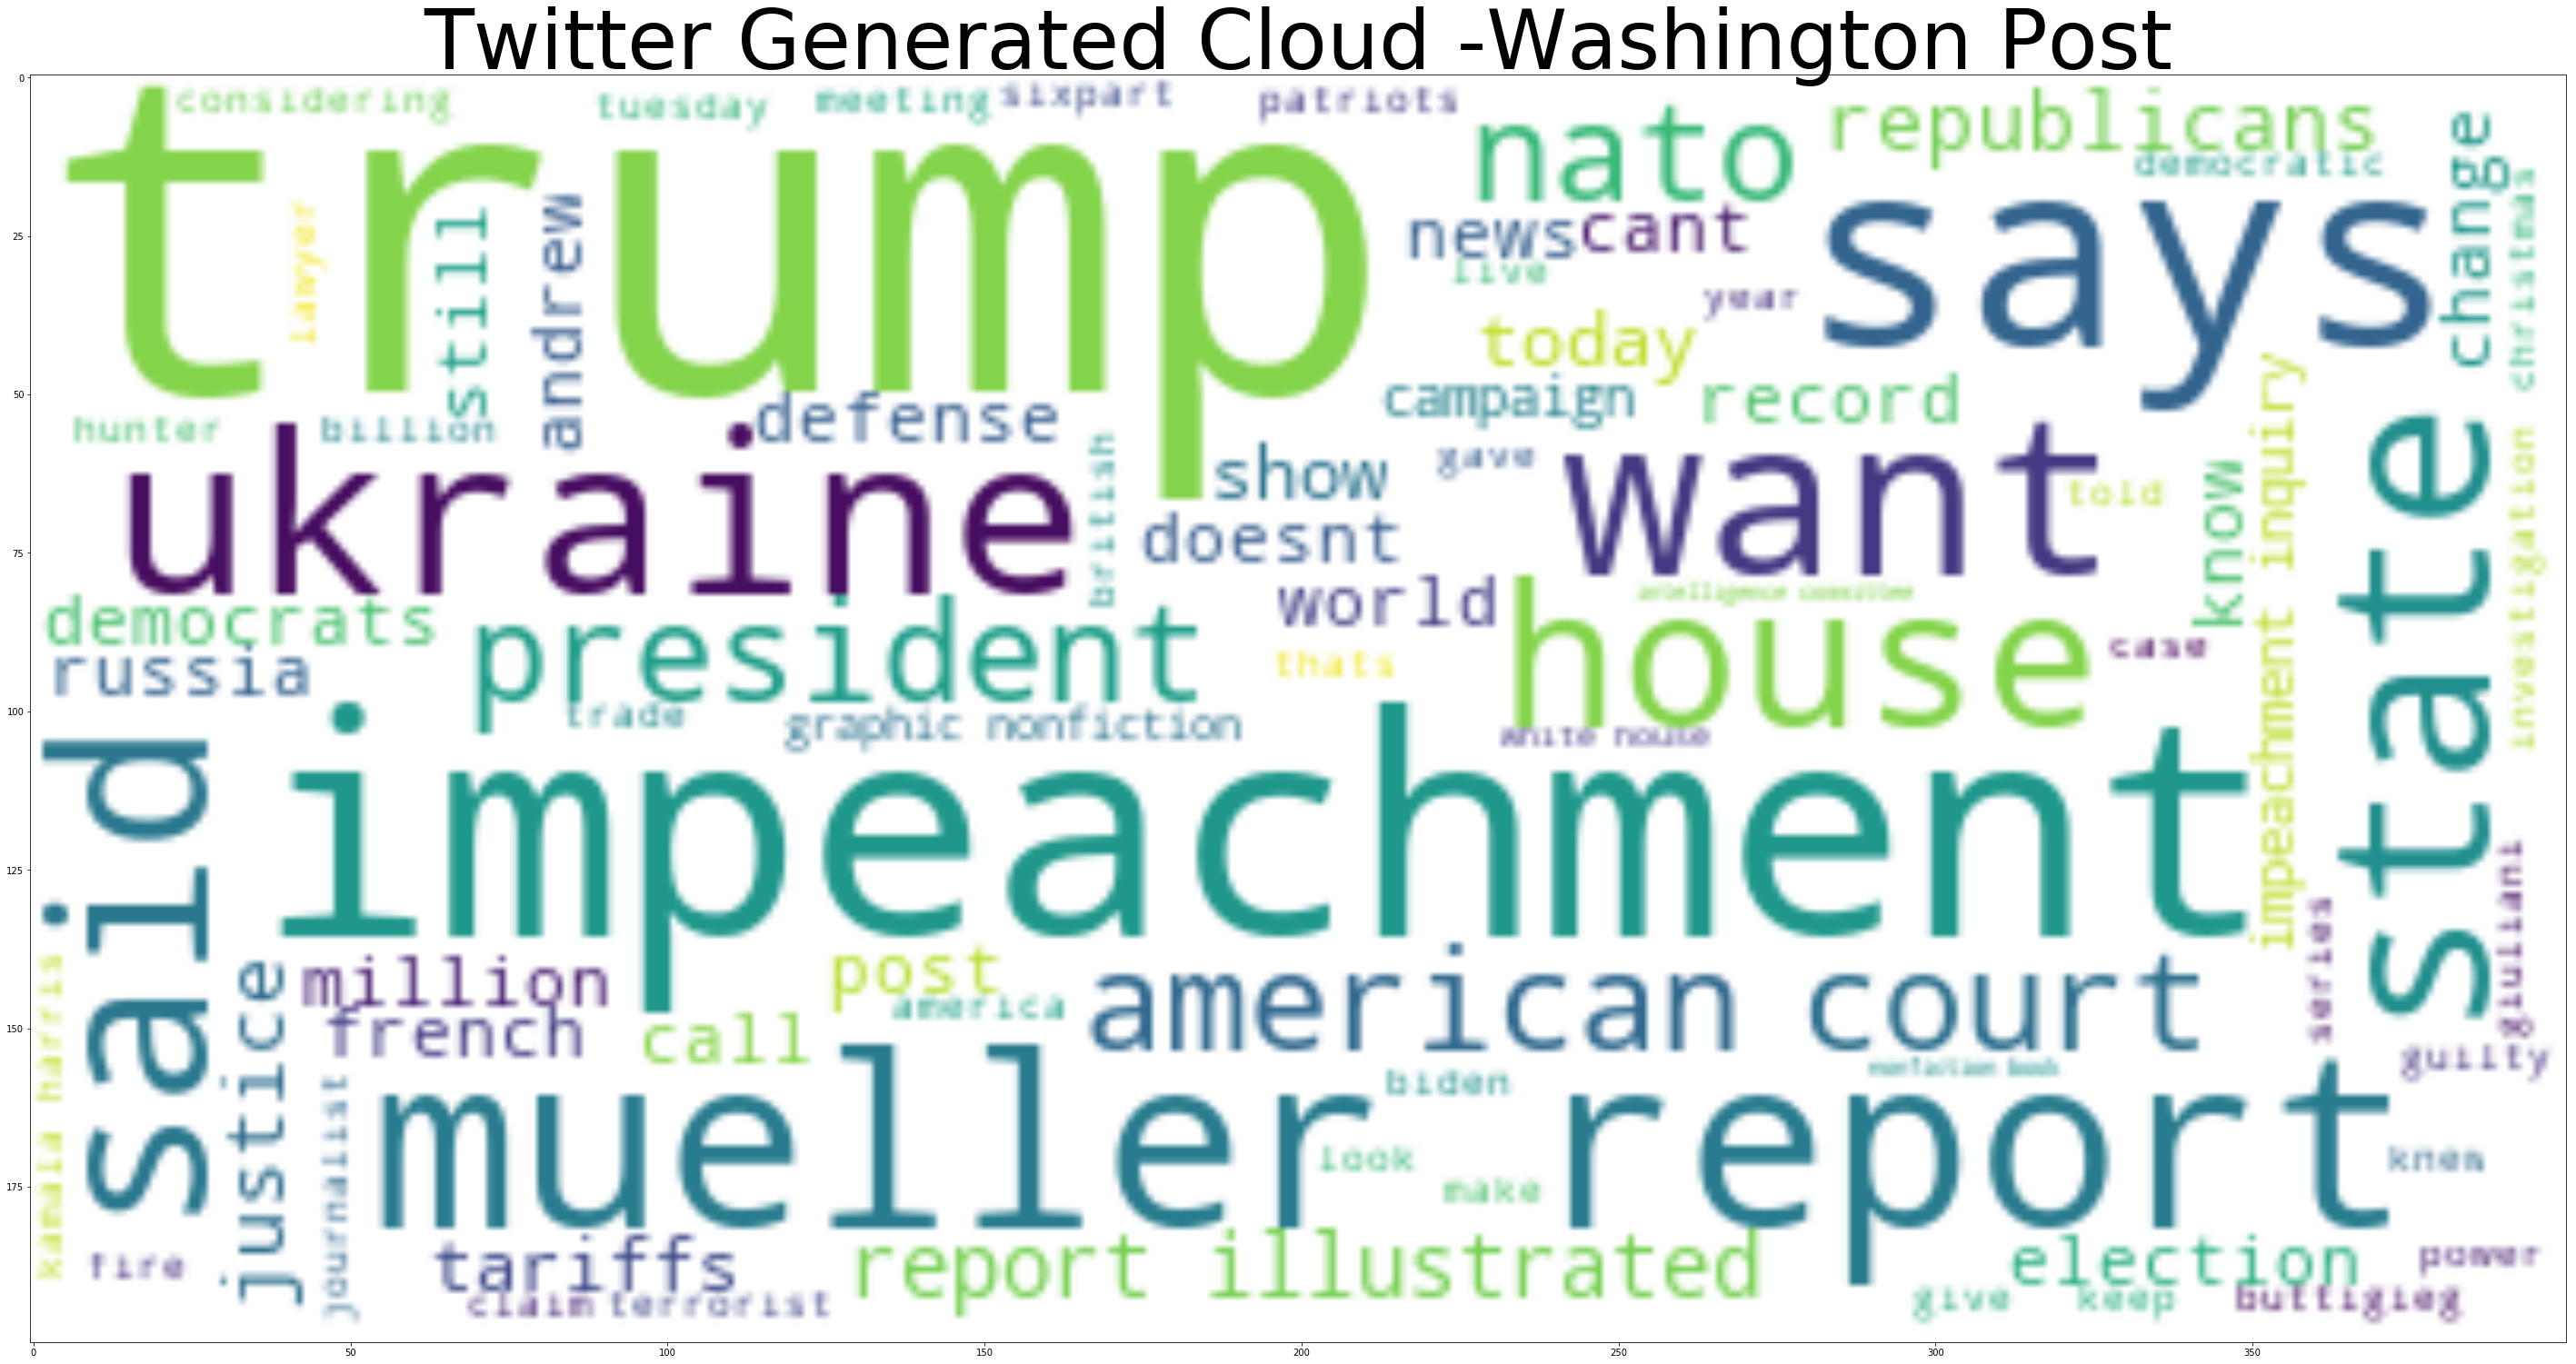

In [148]:
wp = plt.figure(figsize=(50,50))
plt.title('Original Stencil', size=50)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud -Washington Post', size=90)
plt.show()

# Conclusion:

In summary we can see that the the Washington Post Twitter content tends to post a large number of Opinion section stories. It was the highest counted word. The second was Trump, followed by analysis. Analysis and Opinion are story types, therefore we can see that they focus twitter content to share Opinion pieces. Additionally, the Post tends to keep  under the 140 character count, with a large number of tweets with 100-120  characters. Noteably, for the most part, most tweets with a character range of 100-120 characters contained 10-15 words. By looking at the word cloud we can see that there are a large number of words with characteers over 4 letters.  In all, its clear to see the current focus of the Post's twitter contains words related to politics and government - mostly focusing around President Trump,  impeachment , and ukraine. 